# <center><font color='red'> TME 3 - Descente de gradient </font></center>

## <center><code style="background:yellow; color:black"> Algorithme de descente de gradient </code></center>

L’algorithme de descente de gradient permet d’approcher le minimum d’une fonction convexe de manière itérée selon la formule de mise-à-jour de $x^t$ à l’instant $t$ suivant : $x^{t+1} = x^t − \epsilon * ∇f(x^t)$. Coder une fonction **optimize(fonc, dfonc, xinit, eps, max_iter)** qui implémente l’algorithme du gradient avec en paramètre : **fonc** la fonction à optimiser, **dfonc** le gradient de cette fonction, **xinit** le point initial, **eps** le pas de gradient, **max_iter** le nombre d’itérations. Cette fonction doit rendre un triplet **(x_histo, f_histo, grad_histo)**, respectivement la liste des points $x^t, f(x^t)$ et $∇f(x^t)$. Pour cela vous pouvez utiliser une liste pour stocker au fur et à mesure les points, puis transformer chaque liste en un tableau **np.array**.

In [205]:
import numpy as np
from math import *
from numpy import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [206]:
def derive(function, value):
    h = 0.00000000001
    top = function(value + h) - function(value)
    bottom = h
    slope = top / bottom    # Returns the slope to the third decimal
    return float("%.3f" % slope)

In [207]:
def optimize(fonc, dfonc, xinit, eps, max_iter):
    x_histo = []
    f_histo = []
    grad_histo = []
    
    x_histo.append(xinit)
    f_histo.append(fonc(xinit))
    for i in range(max_iter):
        x = x_histo[i] - eps * dfonc(x_histo[i])
        x_histo.append(x)
        f_histo.append(fonc(x_histo[i]))
        grad_histo.append(dfonc(x_histo[i]))
        
    return np.array(x_histo), np.array(f_histo), np.array(grad_histo)
        

## <center><code style="background:yellow; color:black"> Optimisation de fonctions </code></center>

Testez votre implémentation sur les 3 fonctions suivantes : 
<ul>
    <li> en 1d sur la fonction $f(x) = xcos(x)$ </li>
    <li> en 1d sur la fonction $−log(x) + x^2$ </li>
    <li> en 2d sur la fonction Rosenbrock (ou banana), définie par : $f(x1,x2) = 100 * (x^2 − x^{2}_1)^2 + (1−x_1)^2$ </li>
</ul>
Tracer :
<ul>
    <li> en fonction du nombre d’itérations, les valeurs de **f** et du gradient de **f** </li>
    <li> sur un même graphe avec deux couleurs différentes, la fonction **f** et la trajectoire de l’optimisation ( les valeurs successives de $f(x^t)$ ) </li>
    <li> la courbe ($t$, $log(||x^t−x^∗||))$, avec $x^∗$ la valeur optimale atteinte. Que remarquez vous ? </li>
</ul>
Vous pouvez utiliser le code suivant pour une visualisation 3d (après avoir fait une visulatisation 2d).

In [81]:
def make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5,step=20,data=None):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :return: une matrice 2d contenant les points de la grille, la liste x, la liste y
    """
    if data is not None:
        xmax,xmin,ymax,ymin = np.max(data[:,0]),np.min(data[:,0]),\
                              np.max(data[:,1]),np.min(data[:,1])
    x,y = np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step),
                      np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y

# mafonction = ...
# grid,xx,yy = make_grid(-1,3,-1,3,20)
# plt.figure()
# plt.contourf(xx,yy,mafonction(grid).reshape(xx.shape))



# fig = plt.figure()
# ax = fig.gca(projection='3d')
# surf = ax.plot_surface(xx, yy, mafonction(grid).reshape(xx.shape),rstride=1,cstride=1, cmap=cm.gist_rainbow, linewidth=0, antialiased=False)
# fig.colorbar(surf)
# plt.show()


In [209]:
def f1(x):
    return x*np.cos(x)

def df1(x):
    return np.cos(x) - np.sin(x) 

def f2(x):
    return -np.log(x) + x**2

def df2(x):
    return -(1/x) + 2*x

def f3(x1, x2):
    return 100 * ( x2 - x1**2 )**2 + ( 1 - x1 )**2

def df3(x1, x2):
    return None

5.078

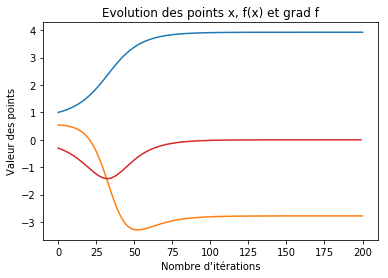

In [80]:
x, f, g = optimize(f1, df1, 1, 0.05, 200)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Valeur des points")
plt.title("Evolution des points x, f(x) et grad f")
ax.plot(np.arange(len(x)), x, color='tab:blue')
ax.plot(np.arange(len(f)), f, color='tab:orange')
ax.plot(np.arange(len(g)), g, color='tab:red')

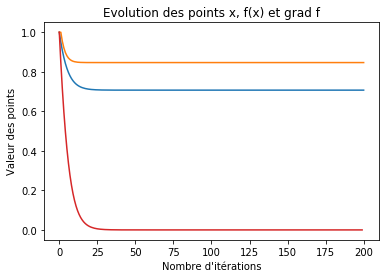

In [57]:
x, f, g = optimize(f2, df2, 1, 0.05, 200)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.xlabel("Nombre d'itérations")
plt.ylabel("Valeur des points")
plt.title("Evolution des points x, f(x) et grad f")
ax.plot(np.arange(len(x)), x, color='tab:blue')
ax.plot(np.arange(len(f)), f, color='tab:orange')
ax.plot(np.arange(len(g)), g, color='tab:red')

## <center><code style="background:yellow; color:black"> Régression logistique </code></center>

Implémenter la descente de gradient pour la régression logistique. Faire pour cela une classe qui comporte : 
<ul>
    <li> un constructeur pour initialiser les paramètres de la descente de gradient (nombre d’itérations, pas de gradient, ... ) </li>
    <li> une méthode **fit(datax, datay)** qui permet d’apprendre le modèle sur les données **datax** de label **datay** </li>
    <li> une méthode **predict(datax)** qui permet d’obtenir les labels prédits pour les exemples de **datax** </li>
    <li> une méthode **score(datax, datay)** qui permet d’obtenir le pourcentage de bonne classification. </li>
</ul>
Rappel : les données **datax** sont sous la forme d’une matrice, chaque ligne un exemple, chaque colonne une dimension - et **datay** sous la forme d’un vecteur de labels. Tester vos algorithmes sur les données USPS (chiffres manuscrits - en ne choisissant que deux classes parmi les 10) du TME3 de MAPSI http://www-connex.lip6.fr/~baskiotisn/ARF17/USPS.zip. Observer la valeur des poids. Comparer à un classifieur bayésien naïf. <br>
Utiliser le code suivant pour lire le fichier de données :

In [198]:
def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

train_x, train_y = load_usps("usps_train.txt")
test_x, test_y = load_usps("usps_test.txt")

class12_train_x = train_x[ np.where( (train_y == 1) | (train_y == 2) ) ]
class12_train_y = np.where( (train_y == 1) | (train_y == 2) )[0]

class12_test_x = test_x[ np.where( (test_y == 1) | (test_y == 2) ) ]
class12_test_y = np.where( (test_y == 1) | (test_y == 2) )[0]

print(class12_train_x.shape, class12_train_y.shape)
print(class12_test_x.shape, class12_test_y.shape)
print(class12_test_x)

(1736, 256) (1736,)
(462, 256) (462,)
[[0.004 1.572 1.396 ... 0.    0.    0.   ]
 [0.    0.    1.469 ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 1.36  0.619 0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]]


In [185]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

def cost_function(datax, datay, w):
    z = np.dot(w, datax.T)
    sig = sigmoid(z)
    m = len(datay)
    return np.dot( (sig - datay), datax ) * ( 1 / m )

In [203]:
class RegressionLogistique():
    
    def __init__(self, max_iter, eps):
        self.max_iter = max_iter
        self.eps = eps
        
    def fit(self, datax, datay):
        self.w = np.random.random(datax.shape[1])
        for i in range(self.max_iter):
            self.w -= self.eps * cost_function(datax, datay, self.w)
            
    def predict(self, datax):
        z = np.dot( self.w, datax.T )
        sig = sigmoid(z)
        self.pred = np.where( (sig >= 0.5), 1, 0 )
        
    def score(self, datay):
        labels = np.unique(datay)
        classif_0 = np.where(((self.pred == labels[0]) & (datay == labels[0])), 1, 0).sum() 
        classif_1 = np.where(((self.pred == labels[1]) & (datay == labels[1])), 1, 0).sum()
        self.score = ( classif_0 + classif_1 ) / len(datay)
        #print(self.score)

In [204]:
rl = RegressionLogistique(2000, 0.01)
rl.fit(class12_train_x, class12_train_y)
rl.predict(class12_test_x)
rl.score(class12_test_y)